<a href="https://colab.research.google.com/github/ahmadr9279/Data-Analytics-course/blob/main/Ahmad_Rabah_3_2_Python_Pandas_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: Data Analysis & Wrangling using salaries dataset

In [125]:
#import needed libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load data using this link:

https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Salaries.csv


In [126]:
#load data
salary = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Salaries.csv')
salary

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...,...
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329


#Data inspection:

Get to know your dataset by looking at its shape, the column names, overall descriptive statistics etc.

In [127]:
salary.shape

(397, 7)

In [128]:
salary.columns

Index(['Unnamed: 0', 'rank', 'discipline', 'yrs.since.phd', 'yrs.service',
       'sex', 'salary'],
      dtype='object')

In [ ]:
salary.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


# Data Exploration: 

This should include summary statistics, means, medians, quartiles, or any other relevant information about the data set. 
* mean/median of all salaries
* Median salary between gender and/or rank(title)
* Etc..


In [129]:
salary_mean = salary['salary'].mean()
salary_median = salary['salary'].median()
print('The mean for all salaries is ${} while the median for all salaries is ${}'.format(salary_mean, salary_median) )

The mean for all salaries is $113706.45843828715 while the median for all salaries is $107300.0


In [152]:
#salary.groupby(['sex'])['Unnamed: 0'].describe()
female_salary = salary[salary['sex'] == 'Female']
female_median = female_salary['salary'].median()
female_median_ex = female_salary['yrs.service'].median()
print('Median service for females is {}'.format(female_median_ex))
print('The median salary for a female is ${}'.format(female_median))
male_salary = salary[salary['sex']=='Male']
male_median = male_salary['salary'].median()
male_median_ex = male_salary['yrs.service'].median()
print('Median service for males is {}'.format(male_median_ex))
print('The median salary for a male is ${}'.format(male_median))
print('The difference between the median male and median female salary is ${}'.format(male_median-female_median))



Median service for females is 10.0
The median salary for a female is $103750.0
Median service for males is 18.0
The median salary for a male is $108043.0
The difference between the median male and median female salary is $4293.0


# Data Wrangling:
Perform some basic transformations on the data

* Rename values
* Rename columns
* Subset columns
* Check for nulls
* Etc

In [153]:
salary['Unnamed: 0'].is_unique
salary_new = salary.rename(columns={'Unnamed: 0': 'UNIQUE_NUM', 'yrs.since.phd': 'years.since.phd'})
print(salary_new.isnull().sum())
num_null = salary_new.isnull().sum().sum()
print('There are {} nulls in this data set'.format(num_null))
salary_new[['years.since.phd','yrs.service','sex','salary']]

UNIQUE_NUM         0
rank               0
discipline         0
years.since.phd    0
yrs.service        0
sex                0
salary             0
dtype: int64
There are 0 nulls in this data set


,years.since.phd,yrs.service,sex,salary
0,19,18,Male,139750
1,20,16,Male,173200
2,4,3,Male,79750
3,45,39,Male,115000
4,40,41,Male,141500
...,...,...,...,...
392,33,30,Male,103106
393,31,19,Male,150564
394,42,25,Male,101738
395,25,15,Male,95329


#Data visualization:

Create some simple visualizations showing some simple statistics

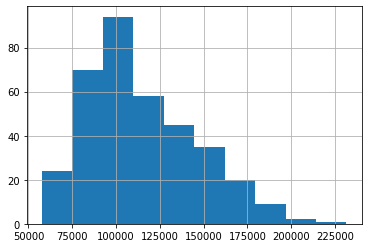

In [ ]:
male_salary['salary'].hist()

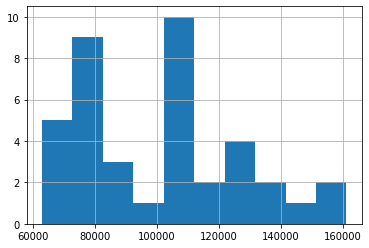

In [ ]:
female_salary['salary'].hist()

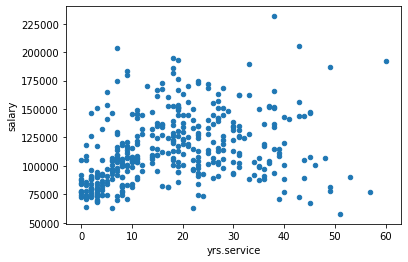

In [ ]:
salary.plot(kind = 'scatter', x = 'yrs.service', y = 'salary')

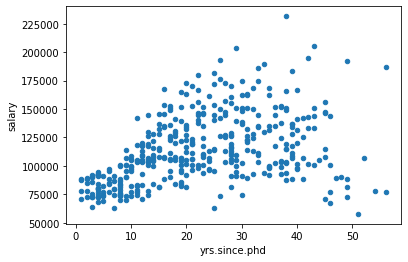

In [ ]:
salary.plot(kind = 'scatter', x = 'yrs.since.phd', y = 'salary')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


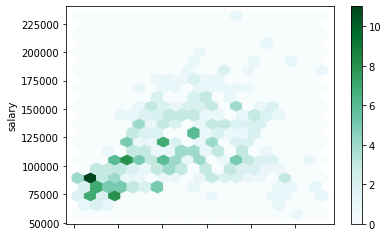

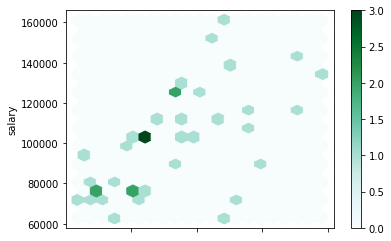

In [ ]:
male_salary['salary'] = male_salary['salary'] + np.arange(1)
male_salary.plot.hexbin(x='yrs.since.phd', y='salary', gridsize=20)

female_salary['salary'] = female_salary['salary'] + np.arange(1)
female_salary.plot.hexbin(x='yrs.since.phd', y='salary', gridsize=20)

# Draw some conclusions based on the data.  What did you discover?

Based on the analysis performed above (both numerical and visual), the conclusions are as follows:

The median salary for men is greater than that for a woman. Moreover, although there seems to be a positive trend in years after obtaining PHD and salary, the greater the year's, the more unpredictable your salary range could be. For example, someone with 50 years since they obtained their PHD could have a salary anywhere from $55,000 to nearly 200,000. So just because you get a PHD and have more experience doesn't mean you will earn more money.
When looking at the scatter plot, it resembles a bell curve so the people with the median amount of experience are more clustered in a nice salary range. Also, I found out that men have a median of 18 years of service in this data set while women have a median of 10 years of service which might account for some of the difference between salaries.






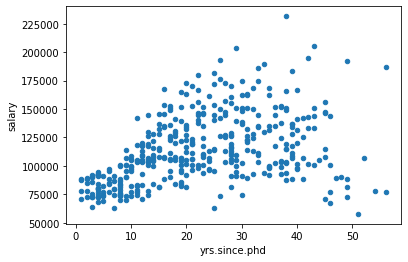

In [148]:
salary.plot(kind = 'scatter', x = 'yrs.since.phd', y = 'salary')